# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

#!pip install citipy

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



611

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#query_url = url + weather_api_key
query_url = f"{url}appid={weather_api_key}&units={units}&q="


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set up lists to hold reponse info
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

count = 0

#  response = requests.get(query_url + city).json()
    
# Loop through the list of cities and perform a request for data on each

for city in cities:
    weather_response = requests.get(query_url + city)
    weather_json = weather_response.json()
    #print(weather_json)
    try:
        cityname.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass
        
#print("I made it through the gauntlet. The message survived!")

Processing record 1 of Set 1 | albany
Processing record 2 of Set 1 | port elizabeth
Processing record 3 of Set 1 | martapura
Processing record 4 of Set 1 | lebu
Processing record 5 of Set 1 | rikitea
Processing record 6 of Set 1 | gazojak
Processing record 7 of Set 1 | saint-philippe
Processing record 8 of Set 1 | carauari
Processing record 9 of Set 1 | puerto ayora
Record not found
Record not found
Processing record 10 of Set 1 | panalingaan
Processing record 11 of Set 1 | santa luzia
Processing record 12 of Set 1 | jamestown
Processing record 13 of Set 1 | fortuna
Processing record 14 of Set 1 | kathu
Processing record 15 of Set 1 | cherskiy
Processing record 16 of Set 1 | avarua
Processing record 17 of Set 1 | punta arenas
Processing record 18 of Set 1 | shingu
Record not found
Processing record 19 of Set 1 | port alfred
Processing record 20 of Set 1 | ambon
Processing record 21 of Set 1 | los llanos de aridane
Processing record 22 of Set 1 | orlik
Processing record 23 of Set 1 | hi

Processing record 192 of Set 1 | ambanja
Processing record 193 of Set 1 | grand gaube
Processing record 194 of Set 1 | kuching
Processing record 195 of Set 1 | hami
Processing record 196 of Set 1 | viransehir
Processing record 197 of Set 1 | anse-bertrand
Record not found
Processing record 198 of Set 1 | egvekinot
Processing record 199 of Set 1 | pahrump
Processing record 200 of Set 1 | saskylakh
Processing record 201 of Set 1 | aykhal
Processing record 202 of Set 1 | brownsville
Processing record 203 of Set 1 | severo-kurilsk
Record not found
Processing record 204 of Set 1 | labytnangi
Processing record 205 of Set 1 | lively
Processing record 206 of Set 1 | arraial do cabo
Processing record 207 of Set 1 | tchibanga
Processing record 208 of Set 1 | klaksvik
Processing record 209 of Set 1 | chara
Processing record 210 of Set 1 | srednekolymsk
Processing record 211 of Set 1 | sorong
Processing record 212 of Set 1 | lasa
Processing record 213 of Set 1 | saint-georges
Processing record 214

Processing record 377 of Set 1 | tamale
Processing record 378 of Set 1 | tuatapere
Processing record 379 of Set 1 | tautira
Record not found
Processing record 380 of Set 1 | nuuk
Processing record 381 of Set 1 | nambucca heads
Processing record 382 of Set 1 | port hedland
Record not found
Processing record 383 of Set 1 | husavik
Processing record 384 of Set 1 | rio grande
Processing record 385 of Set 1 | winslow
Processing record 386 of Set 1 | lichinga
Processing record 387 of Set 1 | aripuana
Processing record 388 of Set 1 | tungor
Processing record 389 of Set 1 | bud
Processing record 390 of Set 1 | ixtapa
Processing record 391 of Set 1 | road town
Processing record 392 of Set 1 | lixourion
Processing record 393 of Set 1 | magadan
Record not found
Processing record 394 of Set 1 | west bay
Processing record 395 of Set 1 | marienburg
Processing record 396 of Set 1 | tupik
Record not found
Processing record 397 of Set 1 | sibu
Processing record 398 of Set 1 | plettenberg bay
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create weather data frame
weather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,10.00,62,100,6.19,US,1616985963
1,Port Elizabeth,-33.9180,25.5701,18.00,77,0,6.17,ZA,1616985963
2,Martapura,-3.4167,114.8500,30.00,74,20,1.03,ID,1616985963
3,Lebu,-37.6167,-73.6500,13.22,91,25,4.00,CL,1616985964
4,Rikitea,-23.1203,-134.9692,26.51,71,1,6.54,PF,1616985964


In [6]:
#save to csv
weather_data.to_csv(r'output_data\my_weather_data.csv')
# Show Record Count

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
clean_data = weather_data.loc[weather_data["Humidity"] <=100]
clean_data


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,10.00,62,100,6.19,US,1616985963
1,Port Elizabeth,-33.9180,25.5701,18.00,77,0,6.17,ZA,1616985963
2,Martapura,-3.4167,114.8500,30.00,74,20,1.03,ID,1616985963
3,Lebu,-37.6167,-73.6500,13.22,91,25,4.00,CL,1616985964
4,Rikitea,-23.1203,-134.9692,26.51,71,1,6.54,PF,1616985964
...,...,...,...,...,...,...,...,...,...
558,Maceió,-9.6658,-35.7353,24.00,94,75,1.03,BR,1616985966
559,Lat Yao,15.7510,99.7893,32.78,68,87,3.18,TH,1616986110
560,Isangel,-19.5500,169.2667,28.65,71,49,3.65,VU,1616986110
561,Al Bardīyah,31.7561,25.0865,12.93,68,3,4.62,LY,1616986110


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

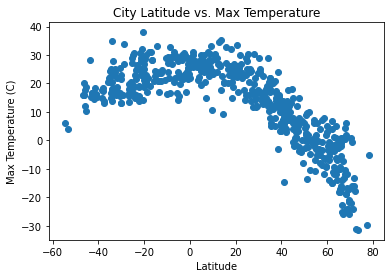

In [8]:
lat_scatter = clean_data["Latitude"]
temp_scatter = clean_data["Max Temp"]

plt.scatter(lat_scatter,temp_scatter)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.savefig('scatplotlatitudemaxtemp')
plt.show()

## Latitude vs. Humidity Plot

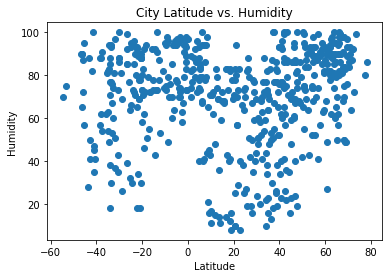

In [9]:
lat_scatter = clean_data["Latitude"]
humidity_scatter = clean_data["Humidity"]

plt.scatter(lat_scatter,humidity_scatter)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('scatplotlatitudehumidity')
plt.show()

## Latitude vs. Cloudiness Plot

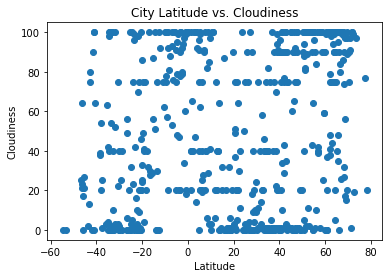

In [10]:
lat_scatter = clean_data["Latitude"]
cloudiness_scatter = clean_data["Cloudiness"]

plt.scatter(lat_scatter,cloudiness_scatter)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('scatplotlatitudecloudy')
plt.show()

## Latitude vs. Wind Speed Plot

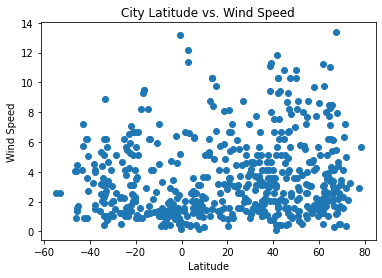

In [11]:
lat_scatter = clean_data["Latitude"]
wind_scatter = clean_data["Wind Speed"]

plt.scatter(lat_scatter,wind_scatter)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('scatplotwindspeed')
plt.show()

## Linear Regression

In [12]:
northern_hemisphere = clean_data.loc[clean_data["Latitude"] >0]
northern_hemisphere

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,10.00,62,100,6.19,US,1616985963
5,Gazojak,41.1875,61.4036,5.68,60,10,2.99,TM,1616985964
9,Panalingaan,8.7842,117.4231,30.20,65,100,2.37,PH,1616985965
11,Jamestown,42.0970,-79.2353,2.78,86,90,10.32,US,1616985833
12,Fortuna,40.5982,-124.1573,9.44,93,75,2.57,US,1616985671
...,...,...,...,...,...,...,...,...,...
555,Zhigalovo,54.8097,105.1578,1.24,74,100,0.87,RU,1616986109
556,Talovaya,51.1144,40.7300,-0.17,84,100,2.81,RU,1616986109
557,Port Hueneme,34.1478,-119.1951,17.22,77,1,6.69,US,1616986109
559,Lat Yao,15.7510,99.7893,32.78,68,87,3.18,TH,1616986110


In [13]:
southern_hemisphere = clean_data.loc[clean_data["Latitude"] <0]
southern_hemisphere

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Port Elizabeth,-33.9180,25.5701,18.00,77,0,6.17,ZA,1616985963
2,Martapura,-3.4167,114.8500,30.00,74,20,1.03,ID,1616985963
3,Lebu,-37.6167,-73.6500,13.22,91,25,4.00,CL,1616985964
4,Rikitea,-23.1203,-134.9692,26.51,71,1,6.54,PF,1616985964
6,Saint-Philippe,-21.3585,55.7679,25.00,69,0,3.09,RE,1616985964
...,...,...,...,...,...,...,...,...,...
550,Lastoursville,-0.8143,12.7287,21.74,98,100,0.65,GA,1616986108
553,Port Pirie,-33.1833,138.0167,23.00,53,0,3.09,AU,1616986108
558,Maceió,-9.6658,-35.7353,24.00,94,75,1.03,BR,1616985966
560,Isangel,-19.5500,169.2667,28.65,71,49,3.65,VU,1616986110


In [14]:
def plot_linear_regression(x_val, y_val, title, text_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_values,"r-")
    plt.annotate(line_eq,text_coord,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8933683698422209


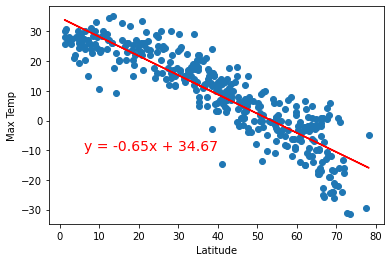

In [15]:
x_val = northern_hemisphere["Latitude"]
y_val = northern_hemisphere["Max Temp"]
plt.savefig('regplottemp_lat')
plot_linear_regression(x_val,y_val,'Max Temp',(6,-10))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.510639890957078


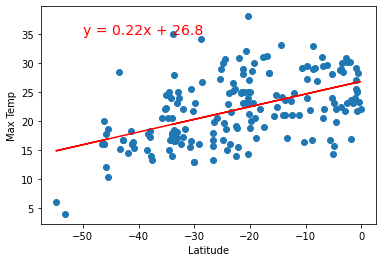

In [16]:
x_val = southern_hemisphere["Latitude"]
y_val = southern_hemisphere["Max Temp"]
plt.savefig('regplottemp_lat_south')
plot_linear_regression(x_val,y_val,'Max Temp',(-50,35))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.31382522628154036


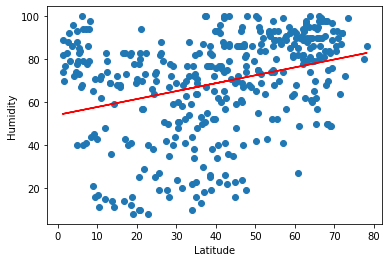

In [17]:
x_val = northern_hemisphere["Latitude"]
y_val = northern_hemisphere["Humidity"]
plt.savefig('regplothumid_lat_north')
plot_linear_regression(x_val,y_val,'Humidity',(45,0))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.25915911049966145


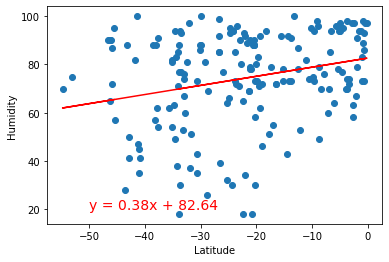

In [18]:
x_val = southern_hemisphere["Latitude"]
y_val = southern_hemisphere["Humidity"]
plt.savefig('regplothumid_lat_south')
plot_linear_regression(x_val,y_val,'Humidity',(-50,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.29842861123139836


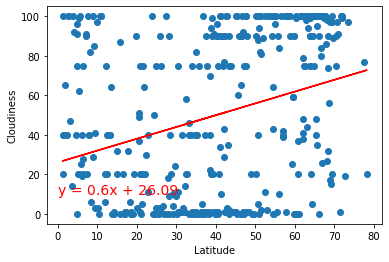

In [19]:
x_val = northern_hemisphere["Latitude"]
y_val = northern_hemisphere["Cloudiness"]
plt.savefig('regplotcloud_lat_north')
plot_linear_regression(x_val,y_val,'Cloudiness',(0,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.4137651709321695


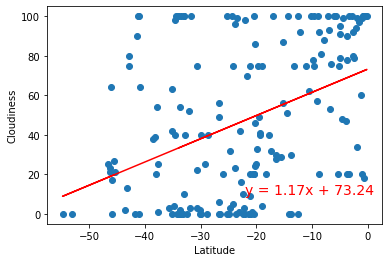

In [20]:
x_val = southern_hemisphere["Latitude"]
y_val = southern_hemisphere["Cloudiness"]
plt.savefig('regplotcloud_lat_south')
plot_linear_regression(x_val,y_val,'Cloudiness',(-22,10))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06600802400782547


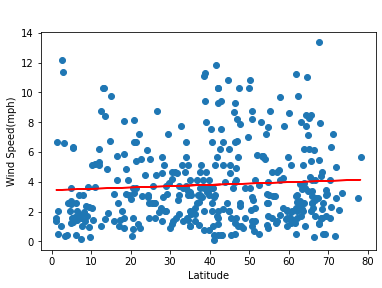

In [21]:
x_val = northern_hemisphere["Latitude"]
y_val = northern_hemisphere["Wind Speed"]
plt.savefig('regplotwind_lat_north')
plot_linear_regression(x_val,y_val,'Wind Speed(mph)',(0,15))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1297493582903423


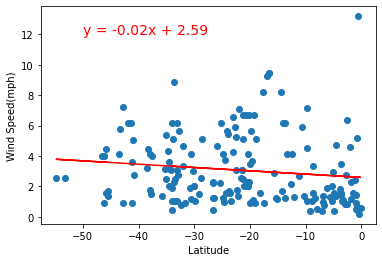

In [22]:
x_val = southern_hemisphere["Latitude"]
y_val = southern_hemisphere["Wind Speed"]
plt.savefig('regplotwind_lat_south')
plot_linear_regression(x_val,y_val,'Wind Speed(mph)',(-50,12))